# PV Array

In [ ]:
# The imports

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## Given

In [ ]:
T = 7 * 24 * 12

p = [-0.0008, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 
     -0.000421, -0.000421, 0.001, 0.001, 0.001, -0.000895, 5.3e-05, 0.001, 
     0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0012, 
     0.002789, 0.001316, 0.002579, 0.001, 0.001, 0.0017, 0.0023, 0.001, 0.001, 
     0.001, 0.001, 0.002158, 0.0018, 0.001, 0.002263, 0.003, 0.001526, 0.002579,
     0.001316, 0.0027, 0.0013, 0.001, 0.001, 0.001, 0.001053, 0.0018, 0.0, 
     -0.000105, -0.001632, 0.000474, 0.044947, 0.152105, 0.3468, 0.8074, 
     1.982895, 4.412004, 4.2155, 4.55477, 14.967692, 19.17, 23.110001, 25.836, 
     29.26, 31.280001, 45.540001, 50.776665, 62.610001, 79.110001, 89.300003,
     116.400002, 137.600006, 160.800003, 185.199997, 217.5, 239.199997, 275.5, 
     308.349976, 342.200012, 375.5, 405.600006, 445.600006, 478.899994,
     519.599976, 553.599976, 589.099976, 624.799988, 660.200012, 698.300049, 
     733.0, 767.700012, 797.799988, 829.0, 853.0, 894.0, 921.0, 956.0, 988.0, 
     1005.0, 1048.0, 1077.0, 1118.0, 1135.0, 1160.0, 1187.0, 1225.0, 1236.0, 
     1248.0, 1278.0, 1322.0, 1332.0, 1355.0, 1373.0, 1399.0, 1414.0, 1425.0, 
     1457.0, 1475.0, 1483.0, 1500.0, 1542.0, 1531.0, 1542.5, 1559.0, 1563.0,
     1593.0, 1585.0, 1598.0, 1608.0, 1611.0, 1614.0, 1631.0, 1636.333374, 
     1635.0, 1638.0, 1644.0, 1620.0, 1654.0, 1674.0, 1664.0, 1648.0, 1662.0,
     1663.0, 1637.0, 1644.333374, 1634.0, 1625.0, 1636.0, 1588.0, 1613.0, 
     1598.0, 1618.0, 1585.0, 1576.0, 1555.0, 1546.0, 1539.0, 1515.0, 1487.0,
     1502.0, 1464.0, 1454.0, 1449.0, 1427.0, 1420.0, 1382.0, 1365.0, 1357.0, 
     1319.0, 1302.0, 1269.0, 1250.0, 1221.0, 1195.666626, 1165.0, 1147.0, 
     1124.0, 1094.0, 1049.0, 1023.0, 1011.0, 978.0, 946.0, 923.0, 878.0, 860.0, 
     818.0, 781.0, 746.599976, 720.200012, 684.0, 642.700012, 616.099976, 
     569.799988, 540.966675, 504.600006, 473.299988, 435.100006, 403.200012,
     372.700012, 342.0, 306.700012, 276.899994, 240.300003, 214.399994, 185.75,
     160.199997, 131.300003, 115.900002, 88.449997, 82.300003, 65.503334, 
     54.299999, 46.07, 41.105, 37.474998, 32.459995, 26.07, 23.120001, 20.59,
     17.717501, 14.55, 11.65, 5.252, 5.313, 4.189167, 0.5128, 0.2392, 0.141632, 
     0.072684, 0.027263, 0.0102, 0.002, -0.000632, -0.001, -0.002474, -0.001421,
     -0.001, -0.001, -0.001, 0.000789, -0.000895, 0.001, -0.001, -0.001, -0.001,
     -0.001, -0.000684, 0.000368, -0.001211, 0.001, 0.001, 0.001, 0.001, 0.001,
     0.001, 0.001, 0.001, 0.001, 0.001, 0.002263, 0.001632, 0.001, 0.002579, 
     0.001316, 0.001, 0.001, 0.001, 0.001, 0.003, 0.001105, 0.0028, 0.001,
     0.001211, 0.003, 0.002579, 0.001526, 0.002368, 0.001, 0.0017, 0.002263, 
     0.001842, 0.002053, 0.001, 0.002158, 0.0018, 0.001, 0.002263, 0.001632,
     0.001, 0.001, 0.001, 0.001, 0.0027, 0.001211, 0.002895, 0.001, 0.003,
     0.0028, 0.0012, 0.003, 0.003, 0.003, 0.002474, 0.001632, 0.003, 0.003, 
     0.002263, 0.001842, 0.003, 0.004053, 0.003842, 0.003, 0.003, 0.003, 0.003,
     0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004895, 0.0032,
     0.005, 0.004789, 0.003316, 0.004579, 0.003, 0.003632, 0.0043, 0.00265,
     0.002368, 0.001737, -0.001895, -0.009263, -0.011105, 0.027, 0.1638,
     0.401316, 0.937316, 2.076053, 8.589999, 3.914684, 3.993842, 17.120001,
     20.35, 23.049999, 25.85, 28.155001, 31.4, 46.3475, 51.709999, 62.684998,
     75.970001, 91.199997, 120.199997, 141.800003, 168.050003, 186.5, 221.0, 
     251.460007, 286.5, 318.200012, 352.799988, 387.799988, 424.5, 459.299988, 
     497.600006, 534.299988, 574.200012, 611.599976, 648.5, 684.599976, 713.5,
     751.099976, 787.400024, 825.0, 861.0, 894.0, 926.0, 977.0, 989.0, 1007.0,
     1047.0, 1085.0, 1113.0, 1127.0, 1166.0, 1191.0, 1218.0, 1248.0, 1270.0,
     1293.0, 1318.0, 1331.0, 1356.5, 1381.0, 1402.0, 1418.0, 1439.0, 1473.0, 
     1495.0, 1508.0, 1529.0, 1542.0, 1554.0, 1576.0, 1595.0, 1587.0, 1609.0,
     1603.0, 1610.0, 1630.0, 1639.0, 1651.0, 1658.0, 1680.0, 1682.0, 1688.0, 
     1689.5, 1696.0, 1718.0, 1693.0, 1698.0, 1709.0, 1704.0, 1725.0, 1699.0, 
     1670.0, 1687.0, 1685.0, 1683.0, 1646.0, 1660.0, 1659.0, 1651.0, 1626.0, 
     1625.0, 1614.0, 1581.0, 1584.0, 1566.5, 1566.0, 1572.0, 1547.0, 1519.0,
     1497.0, 1473.0, 1460.0, 1434.0, 1430.0, 1422.0, 1363.0, 1368.0, 1335.5,
     1307.0, 1296.0, 1266.0, 1236.0, 1206.0, 1177.0, 1151.0, 1134.0, 1089.0, 
     1057.0, 1034.0, 1014.0, 957.0, 926.0, 892.5, 849.0, 826.0, 789.799988, 
     758.5, 725.200012, 695.099976, 660.700012, 621.650024, 569.299988, 537.0,
     510.799988, 471.899994, 446.5, 369.799957, 368.350006, 339.600006, 
     312.799988, 288.200012, 252.300003, 221.600006, 195.399994, 172.0, 148.0, 
     133.0, 111.599998, 90.300003, 74.970001, 63.27, 54.16, 47.529999, 
     41.616249, 37.716156, 26.377142, 23.776667, 21.09, 17.777693, 14.244444, 
     11.351, 5.254, 5.073778, 3.948, 0.391526, 0.210158, 0.122778, 0.0746,
     0.035684, 0.008526, 0.000316, -0.001, -0.001, -0.001, -0.001, -0.001,
     -0.001, -0.000579, 0.000474, -0.000368, 0.001, 0.001, 0.001, 0.001, 0.001, 
     -5.3e-05, 0.000158, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
     0.0027, 0.003, 0.001211, 0.002895, 0.003, 0.003, 0.003, 0.003, 0.003,
     0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003947, 0.003947,
     0.003, 0.003, 0.0042, 0.003737, 0.003, 0.003, 0.001421, 0.004368, 0.0033, 
     0.003, 0.004789, 0.003105, 0.003, 0.003105, 0.0048, 0.003, 0.003211,
     0.004684, 0.003421, 0.004474, 0.003, 0.003, 0.003, 0.003, 0.003842, 0.005,
     0.003947, 0.003, 0.003, 0.003, 0.004263, 0.005, 0.003526, 0.004579, 0.005, 
     0.005, 0.0033, 0.004789, 0.005, 0.003, 0.003105, 0.005, 0.0048, 0.003211, 
     0.004684, 0.003421, 0.005, 0.005, 0.0043, 0.0037, 0.005, 0.005, 0.004053, 
     0.004053, 0.005, 0.005, 0.005, 0.005, 0.004316, 0.004, 0.002421, -0.001368,
     -0.01135, -0.02405, -0.010789, 0.106579, 0.241, 0.619789, 1.4765, 3.841, 
     3.607, 12.898, 17.109091, 22.0, 25.212858, 29.24, 31.720001, 48.25, 
     53.341999, 60.440002, 68.714996, 79.209999, 89.5, 117.0, 146.899994, 173.5,
     198.899994, 226.600006, 257.299988, 288.200012, 318.0, 354.599976, 
     392.299988, 423.399994, 459.25, 486.100006, 533.400024, 563.549988,
     595.233337, 625.200012, 670.050049, 710.5, 729.900024, 775.400024, 812.0, 
     845.5, 878.0, 911.0, 943.0, 984.0, 1017.0, 1043.0, 1082.0, 1099.0, 1126.0,
     1152.0, 1182.0, 1213.0, 1241.0, 1269.0, 1290.0, 1298.0, 1348.0, 1358.0, 
     1380.0, 1404.0, 1422.0, 1424.0, 1481.0, 1482.0, 1499.0, 1503.0, 1530.0,
     1549.0, 1557.0, 1566.0, 1606.0, 1590.0, 1613.0, 1620.5, 1631.0, 1641.0, 
     1649.0, 1661.0, 1668.0, 1685.0, 1677.0, 1701.0, 1691.0, 1680.666626, 
     1690.0, 1665.0, 1691.0, 1688.0, 1699.0, 1678.0, 1668.0, 1662.0, 1653.0, 
     1670.0, 1625.0, 1656.0, 1628.0, 1624.0, 1618.0, 1603.0, 1590.0, 1582.0, 
     1574.0, 1575.0, 1551.0, 1525.0, 1533.0, 1472.0, 1477.0, 1466.0, 1445.0, 
     1425.0, 1413.0, 1378.0, 1390.0, 1352.0, 1324.0, 1308.0, 1297.0, 1257.0,
     1225.0, 1176.0, 1169.0, 1139.0, 1126.0, 1091.0, 1062.0, 1034.0, 1007.0, 
     988.0, 942.0, 896.0, 858.0, 826.0, 800.0, 770.799988, 737.299988, 698.5, 
     661.400024, 625.950012, 593.0, 552.700012, 515.799988, 485.100006,
     446.299988, 411.799988, 378.899994, 343.899994, 307.0, 278.266663, 246.75, 
     216.199997, 187.600006, 154.399994, 135.800003, 115.699997, 96.5, 80.0, 
     61.310001, 54.253998, 45.470001, 39.855999, 37.119999, 26.629999, 
     23.860001, 22.283335, 19.889999, 16.85, 13.59, 14.48, 4.9241, 4.927055, 
     2.7754, 0.3275, 0.166684, 0.088789, 0.0246, 0.01415, 0.003263, 0.000105, 
     0.0, -0.001, -0.0008, 0.0008, -0.000789, 0.001, 0.001, 0.001, 0.001, 0.001,
     0.0017, 0.001526, -0.000158, 0.001, 0.001, 0.001, 0.0022, 0.003, 0.003,
     0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004789, 0.003105, 0.003, 0.003,
     0.003, 0.003, 0.003, 0.003316, 0.004579, 0.003526, 0.004368, 0.0037, 
     0.0043, 0.003, 0.003, 0.003947, 0.003947, 0.004158, 0.0038, 0.003, 
     0.004263, 0.003632, 0.003, 0.004579, 0.003316, 0.0047, 0.0033, 0.003, 
     0.003, 0.003316, 0.005, 0.004474, 0.003632, 0.005, 0.005, 0.005, 0.005, 
     0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.006789, 0.005105,
     0.005, 0.005, 0.005, 0.0052, 0.006789, 0.005316, 0.006579, 0.005526, 0.007,
     0.0063, 0.0043, 0.005579, 0.007895, 0.005, 0.005, 0.005, 0.0062, 0.007, 
     0.007, 0.005632, 0.005, 0.006579, 0.007, 0.0053, 0.005, 0.006789, 0.005105,
     0.005, 0.006842, 0.004, 0.0036, -0.000737, -0.010158, -0.029526, -0.023211,
     0.060158, 0.23775, 0.6221, 1.822167, 6.858, 3.962, 14.496364, 19.48, 
     22.946667, 25.74, 29.285999, 43.690002, 48.049999, 52.400002, 61.240002,
     77.419998, 91.0, 105.050003, 118.199997, 141.399994, 167.399994, 
     194.199997, 222.466659, 253.0, 281.600006, 316.033325, 350.299988, 
     383.950012, 418.100006, 452.899994, 489.0, 521.200012, 562.700012, 
     597.400024, 631.400024, 670.700012, 711.200012, 739.799988, 776.099976,
     809.0, 844.0, 874.0, 909.0, 933.0, 977.0, 1011.0, 1050.0, 1081.0, 1094.0, 
     1124.0, 1156.0, 1179.0, 1214.0, 1234.0, 1260.0, 1283.0, 1305.0, 1330.0, 
     1350.0, 1365.0, 1393.0, 1416.0, 1440.0, 1478.0, 1476.0, 1486.0, 1501.0, 
     1510.0, 1553.0, 1572.0, 1556.0, 1589.0, 1609.0, 1627.0, 1634.0, 1638.0, 
     1647.0, 1646.0, 1659.0, 1663.0, 1666.0, 1675.0, 1689.666626, 1694.0, 
     1698.0, 1685.0, 1693.0, 1695.0, 1691.0, 1689.0, 1693.0, 1687.0, 1689.0, 
     1680.0, 1664.0, 1660.0, 1655.0, 1649.0, 1639.0, 1629.0, 1615.0, 1603.0,
     1592.0, 1577.333374, 1559.0, 1569.0, 1526.0, 1517.0, 1504.0, 1491.0, 
     1467.0, 1463.0, 1429.5, 1406.5, 1376.0, 1365.0, 1333.666626, 1321.0, 
     1289.5, 1270.0, 1246.5, 1221.5, 1192.0, 1180.0, 1154.0, 1104.5, 1075.5, 
     1046.0, 1012.0, 986.0, 953.5, 919.0, 889.0, 853.0, 817.0, 781.299988, 
     756.200012, 710.799988, 677.400024, 639.400024, 605.599976, 562.5, 
     533.799988, 501.100006, 466.399994, 428.0, 399.299988, 363.600006, 
     331.399994, 299.799988, 272.600006, 237.5, 206.899994, 183.199997, 
     157.600006, 136.399994, 114.433334, 94.649994, 79.185005, 64.519997, 
     54.16, 45.209999, 42.400002, 39.0, 36.150002, 26.049999, 22.610001, 
     19.616667, 17.129999, 13.25, 12.9, 5.122263, 4.771167, 0.620001, 0.263,
     0.165158, 0.073263, 0.029684, 0.010105, 0.002211, -0.000316, -0.001,
     -0.001, -0.001737, -0.002158, -5.3e-05, -5.3e-05, 0.000158, 0.001, 0.001,
     0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002895, 0.001,
     0.001, 0.001, 0.0012, 0.003, 0.003, 0.002579, 0.001, 0.001632, 0.0023,
     0.001, 0.001737, 0.003, 0.003, 0.003, 0.003, 0.0018, 0.0022, 0.003, 0.003,
     0.003, 0.001421, 0.002684, 0.0013, 0.001, 0.001, 0.002895, 0.003, 0.003,
     0.0028, 0.0012, 0.002789, 0.001316, 0.003, 0.003, 0.003, 0.003, 0.0023,
     0.001737, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 
     0.003, 0.003, 0.003, 0.003, 0.003, 0.004895, 0.003, 0.004895, 0.0032, 
     0.0048, 0.003211, 0.005, 0.004579, 0.003526, 0.005, 0.005, 0.005, 0.005, 
     0.005, 0.005, 0.003947, 0.003, 0.0042, 0.0038, 0.004263, 0.005, 0.005,
     0.005, 0.005, 0.0033, 0.0047, 0.005, 0.006895, 0.005, 0.005053, 0.0057, 
     0.0028, 0.000474, -0.006053, -0.019947, -0.017316, 0.050053, 0.18055, 
     0.5111, 1.578, 6.235, 10.878333, 14.136667, 17.358572, 20.856667, 
     23.969999, 27.059999, 29.66, 43.450001, 47.720001, 53.712856, 66.440002, 
     79.769997, 95.5, 117.099998, 135.050003, 163.600006, 185.199997, 
     209.199997, 236.599991, 273.600006, 300.0, 338.600006, 370.399994, 
     403.799988, 437.899994, 473.0, 508.100006, 541.200012, 583.700012, 
     612.099976, 648.0, 681.200012, 717.400024, 752.099976, 785.599976, 808.0,
     853.0, 862.0, 914.0, 948.0, 978.0, 1010.0, 1022.0, 1074.0, 1107.0, 1133.75,
     1162.0, 1187.0, 1214.0, 1241.0, 1266.0, 1284.0, 1306.0, 1327.0, 1342.0, 
     1361.0, 1383.0, 1400.0, 1429.0, 1448.0, 1461.0, 1477.0, 1495.0, 1518.0,
     1537.0, 1546.5, 1574.0, 1575.0, 1587.0, 1595.0, 1597.0, 1607.0, 1620.0, 
     1621.0, 1623.0, 1630.0, 1632.0, 1651.0, 1640.0, 1640.0, 1617.0, 1639.0, 
     1641.0, 1619.0, 1646.0, 1638.0, 1638.0, 1640.0, 1639.0, 1635.0, 1636.0,
     1609.0, 1608.0, 1594.0, 1587.0, 1591.0, 1556.0, 1545.0, 1531.5, 1519.0, 
     1500.0, 1482.0, 1461.0, 1451.0, 1433.0, 1419.0, 1401.0, 1380.0, 1361.0, 
     1341.0, 1322.0, 1283.0, 1275.333374, 1252.0, 1228.666626, 1205.0, 1180.0, 
     1152.0, 1140.0, 1098.0, 1054.0, 1017.0, 1026.0, 976.0, 953.0, 921.0, 893.0,
     865.0, 836.0, 805.0, 745.799988, 663.5, 661.5, 619.700012, 583.400024, 
     541.200012, 521.099976, 517.274963, 488.600006, 457.600006, 435.100006, 
     396.299988, 364.799988, 329.200012, 278.700012, 259.5, 228.300003, 
     206.100006, 182.299988, 166.399994, 145.600006, 125.800003, 111.699997, 
     91.800003, 82.349998, 69.336662, 63.27, 56.139999, 50.439999, 44.535789, 
     33.389999, 23.505714, 18.26, 14.88, 12.213333, 7.478, 4.968, 3.906875, 
     0.46495, 0.2392, 0.1296, 0.057211, 0.021947, 0.005632, 0.0004, -0.0006, 
     -0.001, 0.000368, -0.000474, 0.000579, -0.000684, -0.001, 0.0007, 0.001,
     0.001, -0.001, 0.000895, -0.0008, 0.001, 0.001, 0.001, 0.001, 0.001,
     0.001632, 0.0023, 0.0017, 0.003, 0.002158, 0.001, 0.001, 0.001, 0.001,
     0.0022, 0.001737, 0.002368, 0.003, 0.003, 0.001316, 0.0027, 0.003, 0.003,
     0.003, 0.003, 0.003, 0.003, 0.0028, 0.001211, 0.002684, 0.001421, 0.003,
     0.003, 0.0023, 0.0017, 0.003, 0.003, 0.003, 0.004053, 0.002684, 0.0034,
     0.0038, 0.003, 0.003, 0.004474, 0.005, 0.005, 0.005, 0.005, 0.003211, 
     0.004895, 0.005, 0.003105, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004474,
     0.003632, 0.0043, 0.0037, 0.004263, 0.003842, 0.005, 0.005, 0.005, 0.005, 
     0.005, 0.005, 0.005, 0.006474, 0.005421, 0.009211, 0.00575, 0.005, 0.005, 
     0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005632, 
     0.007, 0.00595, 0.004, 0.003158, 0.000579, -0.005737, -0.023316, -0.0186,
     0.031667, 0.1171, 0.2948, 0.714895, 2.383667, 3.591, 12.530909, 16.780001,
     21.1625, 25.950001, 30.23, 35.02, 53.9025, 61.18, 62.599998, 78.003334, 
     92.933334, 113.599998, 121.849998, 144.699997, 162.766663, 198.100006, 
     223.600006, 253.449997, 277.350006, 309.5, 339.649994, 369.366669, 
     401.299988, 436.299988, 473.100006, 501.100006, 553.099976, 587.700012, 
     621.700012, 660.799988, 699.299988, 734.099976, 770.5, 815.0, 843.0,
     877.0, 906.0, 939.0, 973.0, 1001.0, 1032.714233, 1063.0, 1092.5, 1132.0, 
     1182.0, 1194.0, 1224.0, 1250.0, 1271.0, 1294.0, 1301.0, 1349.0, 1389.0,
     1394.0, 1425.0, 1433.0, 1450.0, 1450.0, 1475.0, 1505.0, 1488.0, 1529.0, 
     1551.0, 1565.0, 1577.0, 1585.0, 1612.0, 1618.333374, 1626.0, 1643.0, 
     1649.0, 1659.0, 1674.0, 1674.0, 1675.0, 1681.0, 1687.0, 1688.0, 1708.0, 
     1689.0, 1690.0, 1698.0, 1683.0, 1689.0, 1704.333374, 1719.0, 1686.0, 
     1685.0, 1674.0, 1664.0, 1656.0, 1633.0, 1667.0, 1643.0, 1628.0, 1612.0, 
     1598.0, 1589.0, 1577.0, 1560.0, 1546.666626, 1537.0, 1520.0, 1502.0, 
     1483.0, 1460.0, 1441.0, 1417.0, 1399.0, 1367.666626, 1330.0, 1329.0, 
     1299.0, 1269.0, 1252.0, 1226.0, 1194.0, 1161.0, 1175.0, 1197.0, 972.0, 
     1186.0, 1185.999512, 1040.0, 1115.999878, 993.0, 1142.0, 1003.0, 964.0,
     919.0, 867.0, 802.0, 764.599976, 730.299988, 630.700012, 644.200012,
     604.400024, 569.650024, 534.700012, 493.600006, 437.700012, 400.0, 357.5,
     325.899994, 289.43335, 257.700012, 224.899994, 192.399994, 165.800003, 
     143.800003, 121.300003, 103.400002, 84.233337, 73.639999, 60.509998, 
     52.150002, 48.110001, 43.490002, 40.489998, 35.337143, 24.360003, 
     20.540001, 17.277273, 12.62, 6.972, 4.5837, 3.963727, 0.40355, 0.169368, 
     0.084316, 0.031947, 0.005105, -0.000263, 0.0004, 0.0006, 0.000368, 
     0.001368, 0.002737, 0.003, 0.003, 0.003, 0.003, 0.003, 0.001105, 0.003,
     0.004895, 0.0032, 0.0048, 0.003211, 0.004684, 0.003, 0.003526, 0.004368,
     0.0037, 0.0043, 0.003, 0.003842, 0.004053, 0.004053, 0.005, 0.005, 0.005, 
     0.005, 0.005, 0.005, 0.005, 0.006684, 0.0053, 0.005, 0.005, 0.005, 0.005,
     0.005, 0.005, 0.005, 0.005211, 0.007, 0.006579, 0.005, 0.005, 0.0057,
     0.0063, 0.005, 0.005, 0.005, 0.005, 0.006158, 0.007, 0.0058, 0.005, 0.005,
     0.006474, 0.005421, 0.006684, 0.007, 0.007, 0.005211, 0.005, 0.007,
     0.006895, 0.005, 0.0052, 0.006789, 0.005, 0.005, 0.005526, 0.006368, 
     0.0057, 0.0063, 0.005737, 0.007, 0.007, 0.005947, 0.005, 0.0062, 0.0058,
     0.006263, 0.005632, 0.006474, 0.007, 0.005316, 0.005, 0.0067, 0.007, 0.007,
     0.007, 0.007, 0.007, 0.007, 0.006789, 0.005, 0.005421, 0.007, 0.007, 0.007,
     0.007, 0.006632, 0.005579, 0.003105, -0.001632, -0.016737, -0.0326, 
     -0.0022, 0.119526, 0.343263, 0.908526, 2.692737, 12.46, 12.890909, 17.49, 
     21.93, 26.581665, 42.223888, 47.990002, 54.07, 60.799999, 64.779999, 
     79.089996, 109.399994, 134.300003, 160.5, 179.100006, 192.199997, 
     211.399994, 231.399994, 261.200012, 289.200012, 323.5, 357.200012, 393.5,
     439.299988, 461.899994, 489.700012, 531.799988, 562.5, 605.400024, 
     638.599976, 665.200012, 707.700012, 747.799988, 792.200012, 825.5, 871.0,
     896.0, 925.0, 959.0, 993.0, 1024.0, 1061.0, 1088.0, 1117.0, 1148.0, 1179.0,
     1206.0, 1230.0, 1270.0, 1278.0, 1305.0, 1331.666626, 1343.0, 1375.0, 
     1411.0, 1421.0, 1447.0, 1471.0, 1489.0, 1491.0, 1511.0, 1535.0, 1576.0,
     1575.0, 1587.0, 1601.0, 1615.0, 1633.0, 1640.0, 1655.0, 1680.0, 1667.0, 
     1670.0, 1672.0, 1662.0, 1697.0, 1681.0, 1706.0, 1710.0, 1718.0, 1715.0, 
     1719.0, 1720.0, 1733.0, 1718.0, 1715.5, 1712.0, 1701.0, 1677.0, 1686.0, 
     1682.0, 1672.0, 1661.0, 1644.0, 1635.0, 1627.0, 1578.0, 1604.0, 1595.0, 
     1573.0, 1563.0, 1552.0, 1535.0, 1512.0, 1467.0, 1464.0, 1459.0, 1448.0, 
     1422.0, 1376.0, 1374.0, 1355.0, 1330.0, 1303.0, 1270.0, 1247.0, 1219.0, 
     1202.0, 1170.0, 1145.0, 1114.0, 1083.0, 1056.0, 1023.0, 990.0, 961.0, 
     928.0, 893.0, 853.0, 826.0, 784.200012, 754.700012, 721.599976, 683.799988,
     652.299988, 611.0, 583.200012, 549.76001, 511.600006, 475.299988, 
     438.100006, 404.5, 363.399994, 329.700012, 300.5, 269.399994, 241.75, 
     213.699997, 187.800003, 160.899994, 138.600006, 116.599998, 98.400002, 
     84.5, 68.980003, 58.035, 53.107502, 48.746002, 39.674999, 36.798752, 
     25.378, 22.828335, 19.314615, 14.982727, 11.26, 8.35, 4.753106, 3.231, 
     0.349947, 0.173632, 0.068368, 0.020368, 0.00735, 5e-05, -0.000105, 0.0, 
     -0.001, 0.001, 0.001, 0.001, 0.001211, 0.002684, 0.001421, 0.002474, 
     0.001632, 0.003, 0.0023, 0.001737, 0.003, 0.003, 0.003, 0.003, 0.003, 
     0.003, 0.003, 0.003, 0.004474, 0.003421, 0.004684, 0.0033, 0.0047, 0.005, 
     0.003105, 0.005, 0.003, 0.003, 0.0032, 0.005, 0.005, 0.005, 0.005, 0.005, 
     0.005, 0.005, 0.005, 0.004158, 0.003947, 0.005, 0.005, 0.0038, 0.0042, 
     0.005, 0.005, 0.005]

p = np.array(p)

## Implementation

In [ ]:
# Helper Functions

def L(c):
    t = 12 * 24
    l = (c[0] - c[t-1]) ** 2
    for i in range(t-1):
        l += (c[i] - c[i+1]) ** 2
    return l

def avg_abs_val(r):
    v = 0
    for ele in r:
        v += cp.abs(ele)
    return v / T


# Variables
c = cp.Variable(T)
s = cp.Variable(T)
r = cp.Variable(T)

# Objective
objective = cp.Minimize (L(c) + cp.sum(s))

# Constraints
constraints = [
                s >= 0,
                c >= s,  # Implies c >= 0
                p == c - s + r,
                avg_abs_val(r) <= 4
]

for i in range(288, T):
    constraints += [c[i] == c[i%288]]

# Solving
prob = cp.Problem(objective, constraints)
result = prob.solve()

print ("Minimum of the objective: ", result)

Minimum of the objective:  98131.17653727761


## Graph


In [ ]:
X = [i+1 for i in range(T)]

### p vs T

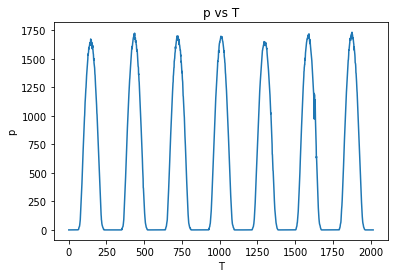

In [ ]:
plt.title("p vs T")
plt.xlabel("T")
plt.ylabel("p")
plt.plot(X, p)

plt.show()

### c vs T

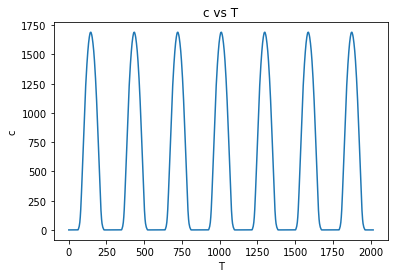

In [ ]:
plt.title("c vs T")
plt.xlabel("T")
plt.ylabel("c")
plt.plot(X, c.value)

plt.show()

### s vs T

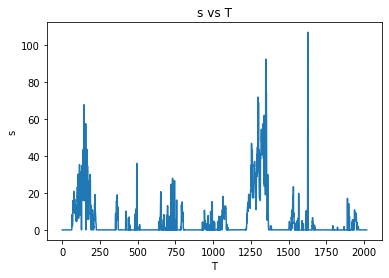

In [ ]:
plt.title("s vs T")
plt.xlabel("T")
plt.ylabel("s")
plt.plot(X, s.value)

plt.show()

### r vs T

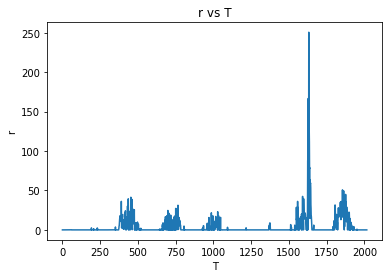

In [ ]:
plt.title("r vs T")
plt.xlabel("T")
plt.ylabel("r")
plt.plot(X, r.value)

plt.show()

## Absolute Values


In [ ]:
print ("Average p:", cp.sum(p).value / T)
print ("Average c:", cp.sum(c).value / T)
print ("Average s:", cp.sum(s).value / T)
print ("Average Absolute r:", avg_abs_val(r).value)

Average p: 529.0375009330357
Average c: 529.5164833304459
Average s: 4.478806022258057
Average Absolute r: 4.000212445610442
